In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [13]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [14]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")
(x_train, y_train), (x_val, y_val)=cifar10.load_data()

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

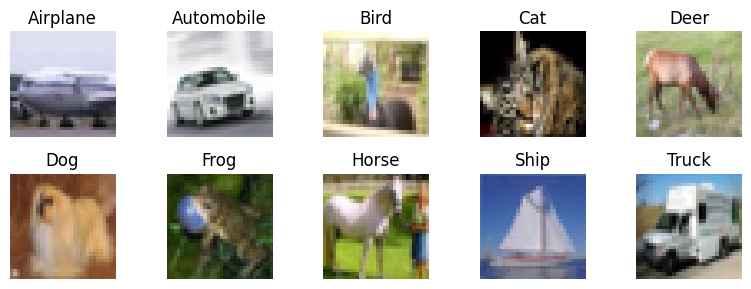

In [15]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [16]:
y_val

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [17]:

x_train=x_train/255.0
x_val=x_val/255.0
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

Training: (50000, 32, 32, 3) (50000, 10)
Validation: (10000, 32, 32, 3) (10000, 10)


# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [40]:
model=keras.Sequential(
    [
    layers.Input((32, 32, 3)),
    layers.Conv2D(10, (3, 3), padding='same', activation='sigmoid'),
    layers.Conv2D(10, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(15, (3, 3), padding='same', activation='sigmoid'),
    layers.Conv2D(15, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(8, (3, 3), padding='same', activation='sigmoid'),
    layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(25, activation='sigmoid'),
    layers.Dense(10, activation='softmax'),
    ]               
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 10)        280       
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 10)        910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 10)       0         
 g2D)                                                            
                                                                 
 batch_normalization_9 (Batc  (None, 16, 16, 10)       40        
 hNormalization)                                                 
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 15)        1365      
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 15)      

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [41]:
#(refrences:https://keras.io/examples/vision/mnist_convnet/)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Train your model for `10 epochs` and proper `batch_size`.

In [42]:
batch_size = 256
epoch = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch,  validation_data=(x_val, y_val))




Epoch 1/10
196/196 [==============================] - 7s 18ms/step - loss: 1.9913 - accuracy: 0.2931 - val_loss: 2.4373 - val_accuracy: 0.1001
Epoch 2/10
196/196 [==============================] - 2s 12ms/step - loss: 1.6177 - accuracy: 0.4328 - val_loss: 3.0383 - val_accuracy: 0.1025
Epoch 3/10
196/196 [==============================] - 2s 11ms/step - loss: 1.4719 - accuracy: 0.4848 - val_loss: 3.0897 - val_accuracy: 0.1887
Epoch 4/10
196/196 [==============================] - 2s 11ms/step - loss: 1.3810 - accuracy: 0.5158 - val_loss: 2.1042 - val_accuracy: 0.2609
Epoch 5/10
196/196 [==============================] - 2s 12ms/step - loss: 1.3225 - accuracy: 0.5349 - val_loss: 2.6523 - val_accuracy: 0.2287
Epoch 6/10
196/196 [==============================] - 3s 13ms/step - loss: 1.2802 - accuracy: 0.5499 - val_loss: 1.5014 - val_accuracy: 0.4772
Epoch 7/10
196/196 [==============================] - 2s 11ms/step - loss: 1.2512 - accuracy: 0.5591 - val_loss: 2.9040 - val_accuracy: 0.1719

This function plots the `loss` and `accuracy` of your model by the model's history.

In [43]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

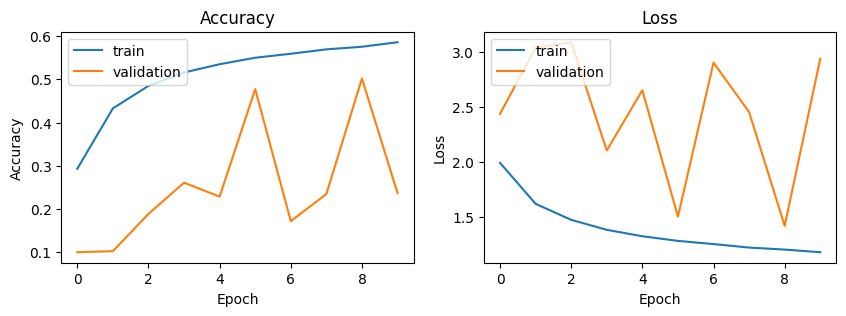

In [44]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [46]:
data_aug=keras.Sequential([layers.RandomFlip('vertical'),
  layers.RandomRotation(0.2),])
model=keras.Sequential([
    layers.Input((32, 32, 3)),
    data_aug,
    layers.Conv2D(10, (3, 3), padding='same', activation='sigmoid'),
    layers.Conv2D(10, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(15, (3, 3), padding='same', activation='sigmoid'),
    layers.Conv2D(15, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(8, (3, 3), padding='same', activation='sigmoid'),
    layers.Conv2D(8, (3, 3), padding='same', activation='relu'),
    layers.MaxPool2D((2, 2), strides=(2, 2)),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(25, activation='sigmoid'),
    layers.Dense(10, activation='softmax'),
])

In [47]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [48]:

history = model.fit(x_train, y_train, batch_size=256, epochs=10,  validation_data=(x_val, y_val))


Epoch 1/10
196/196 [==============================] - 8s 18ms/step - loss: 2.0656 - accuracy: 0.2422 - val_loss: 2.7570 - val_accuracy: 0.1000
Epoch 2/10
196/196 [==============================] - 3s 13ms/step - loss: 1.8544 - accuracy: 0.3231 - val_loss: 2.3135 - val_accuracy: 0.1794
Epoch 3/10
196/196 [==============================] - 2s 12ms/step - loss: 1.7894 - accuracy: 0.3445 - val_loss: 2.3061 - val_accuracy: 0.2211
Epoch 4/10
196/196 [==============================] - 2s 12ms/step - loss: 1.7406 - accuracy: 0.3663 - val_loss: 1.8529 - val_accuracy: 0.3270
Epoch 5/10
196/196 [==============================] - 2s 12ms/step - loss: 1.6996 - accuracy: 0.3828 - val_loss: 2.7795 - val_accuracy: 0.1849
Epoch 6/10
196/196 [==============================] - 3s 15ms/step - loss: 1.6637 - accuracy: 0.3976 - val_loss: 1.7516 - val_accuracy: 0.3511
Epoch 7/10
196/196 [==============================] - 2s 12ms/step - loss: 1.6324 - accuracy: 0.4111 - val_loss: 3.5403 - val_accuracy: 0.1000

Let's see your model performance with augmentation.

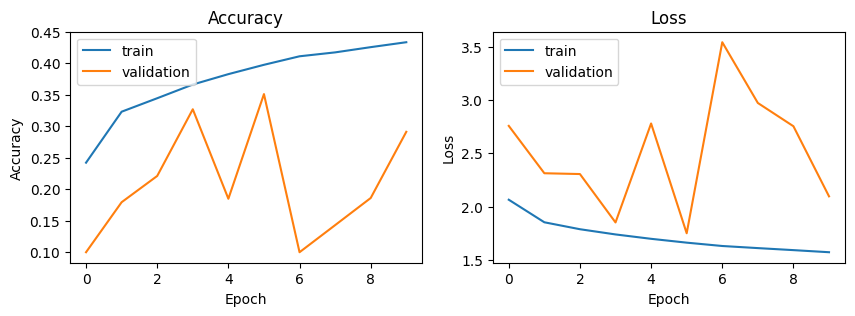

In [49]:
plot_acc_loss(history)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

In [52]:
new_size=keras.Sequential([
  layers.Resizing(224, 224),
])
#load resnet dataset for solve question
resnet_ds=keras.applications.ResNet50(weights='imagenet',include_top=False)
resnet_ds.trainable = False
model=keras.Sequential([
    layers.Input((32, 32, 3)),
    new_size,
    resnet_ds,
    layers.BatchNormalization(),
    layers.Conv2D(20, (1, 1), padding='same', activation='sigmoid'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 batch_normalization_17 (Bat  (None, 7, 7, 2048)       8192      
 chNormalization)                                                
                                                                 
 conv2d_43 (Conv2D)          (None, 7, 7, 20)          40980     
                                                                 
 batch_normalization_18 (Bat  (None, 7, 7, 20)         80        
 chNormalization)                                                
                                                                 
 flatten_12 (Flatten)        (None, 980)             

In [53]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=256, epochs=10,  validation_data=(x_val, y_val))


Epoch 1/10
196/196 [==============================] - 194s 964ms/step - loss: 1.9359 - accuracy: 0.3083 - val_loss: 2.2295 - val_accuracy: 0.1432
Epoch 2/10
196/196 [==============================] - 184s 941ms/step - loss: 1.5919 - accuracy: 0.4390 - val_loss: 1.9095 - val_accuracy: 0.3894
Epoch 3/10
196/196 [==============================] - 184s 940ms/step - loss: 1.5011 - accuracy: 0.4719 - val_loss: 1.6488 - val_accuracy: 0.4136
Epoch 4/10
196/196 [==============================] - 184s 940ms/step - loss: 1.4360 - accuracy: 0.4964 - val_loss: 1.5236 - val_accuracy: 0.4489
Epoch 5/10
196/196 [==============================] - 171s 874ms/step - loss: 1.4067 - accuracy: 0.5049 - val_loss: 1.5768 - val_accuracy: 0.4543
Epoch 6/10
196/196 [==============================] - 183s 937ms/step - loss: 1.3796 - accuracy: 0.5160 - val_loss: 1.3812 - val_accuracy: 0.5160
Epoch 7/10
196/196 [==============================] - 184s 940ms/step - loss: 1.3436 - accuracy: 0.5283 - val_loss: 1.3660 -

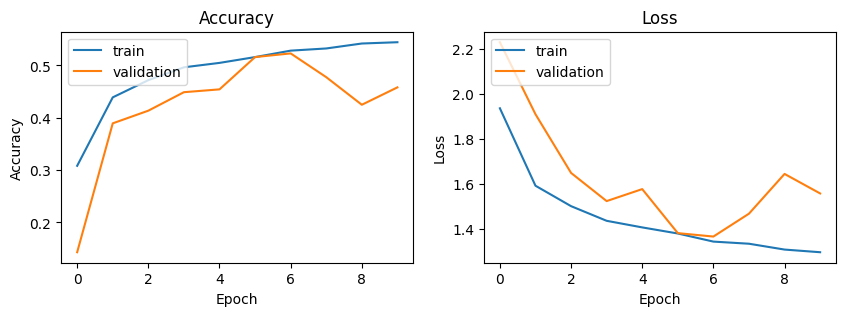

In [54]:
plot_acc_loss(history)

## Use only the first three blocks (`extra bonus`)

In [55]:
# ihave no time for answer it :( 